In [1]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

In [2]:
import yfinance as yf
import pandas as pd
import numpy as np
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error
import matplotlib.pyplot as plt
from datetime import datetime, timedelta

In [3]:
# Set random seed for reproducibility
np.random.seed(42)

# Load historical stock data for Apple (AAPL)
ticker = 'AAPL'
end_date = datetime.now().strftime('%Y-%m-%d')
start_date = (datetime.now() - timedelta(days=365)).strftime('%Y-%m-%d')
data = yf.download(ticker, start=start_date, end=end_date, progress=False)


/tmp/ipykernel_13/628203249.py:8: FutureWarning: YF.download() has changed argument auto_adjust default to True
  data = yf.download(ticker, start=start_date, end=end_date, progress=False)


In [4]:
# Prepare features and target
data['Prev_Close'] = data['Close'].shift(1)
data['Target'] = data['Close'].shift(-1)
data = data.dropna()

# Define features and target
features = ['Open', 'High', 'Low', 'Volume', 'Prev_Close']
X = data[features]
y = data['Target']


In [5]:
# Split data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, shuffle=False)


In [6]:
# Train Random Forest model
model = RandomForestRegressor(n_estimators=100, random_state=42)
model.fit(X_train, y_train)

RandomForestRegressor(random_state=42)

In [7]:
# Make predictions
y_pred = model.predict(X_test)

# Calculate Mean Squared Error
mse = mean_squared_error(y_test, y_pred)
print(f'Mean Squared Error: {mse:.2f}')


Mean Squared Error: 18.84


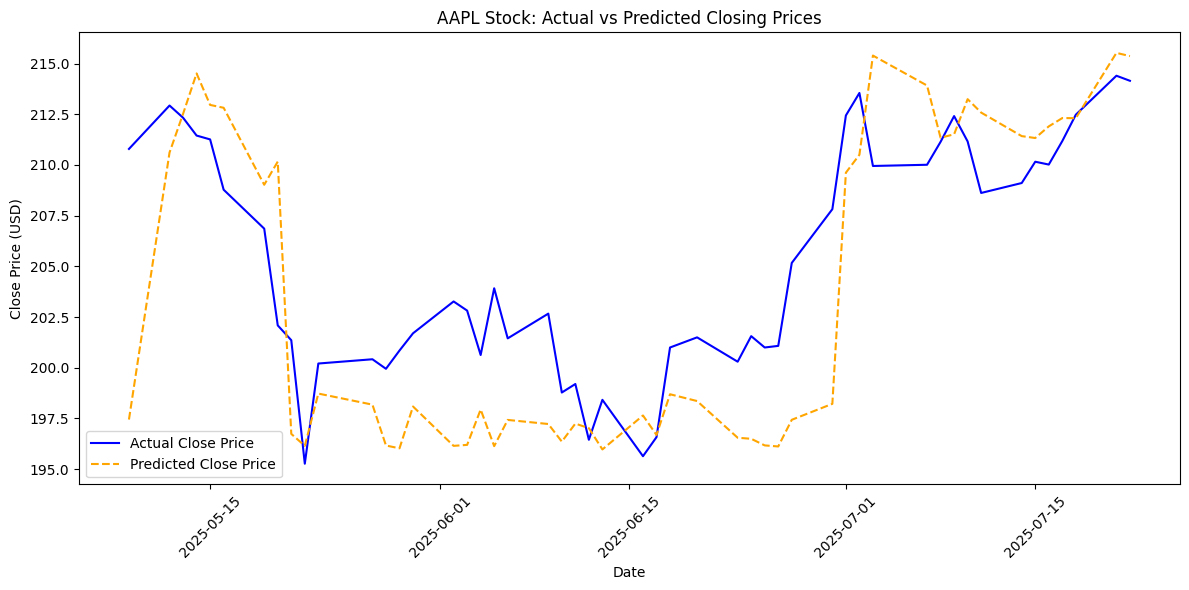

In [8]:
# Prepare data for plotting
test_dates = X_test.index
actual_prices = y_test
predicted_prices = y_pred

# Plot actual vs predicted prices
plt.figure(figsize=(12, 6))
plt.plot(test_dates, actual_prices, label='Actual Close Price', color='blue')
plt.plot(test_dates, predicted_prices, label='Predicted Close Price', color='orange', linestyle='--')
plt.title(f'{ticker} Stock: Actual vs Predicted Closing Prices')
plt.xlabel('Date')
plt.ylabel('Close Price (USD)')
plt.legend()
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

In [9]:
# Predict next day's closing price
last_data = data[features].iloc[-1].values.reshape(1, -1)
next_day_prediction = model.predict(last_data)
print(f'Predicted closing price for the next trading day: ${next_day_prediction[0]:.2f}')

Predicted closing price for the next trading day: $215.37
